In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
df_train_orig = pd.read_csv('https://intro-ds-gv.s3.amazonaws.com/processed_train.csv')
df_test_orig = pd.read_csv('https://intro-ds-gv.s3.amazonaws.com/processed_test.csv')
df_train_orig = df_train_orig.dropna()
df_test_orig = df_test_orig.dropna()

In [ ]:
df_train = df_train_orig.copy()
df_test = df_test_orig.copy()

In [ ]:
df_train = df_train[['product' , 'narrative']]
df_test = df_test[['product' , 'narrative']]

**Updating the products with numbers from 0 to 4**

In [ ]:
prod_match_dict ={'debt_collection':0, 'credit_card':1, 'credit_reporting':2,'retail_banking':3, 'mortgages_and_loans':4}
df_train['product'].replace(prod_match_dict, inplace=True)
df_test['product'].replace(prod_match_dict, inplace=True)

In [ ]:
print(df_train.tail())
print('----------------------------------')
print(df_test.tail())

        product                                          narrative
485760        2  loan turned loan opened calling payment day ag...
485761        3  personal business customer key bank year busin...
485762        0  ca tx using illegal fraudulent collect debt am...
485763        0  today received call southwest credit system se...
485764        4  qwr notice error att sn servicing corporation ...
----------------------------------
        product                                          narrative
292329        2  nelnet never report payment made credit bureau...
292330        2  submitting complaint third party involved pati...
292331        0  attentively review formal writ composed declar...
292332        2  writing dispute following information report c...
292333        2  submitted dispute claim requesting sent verifi...


In [ ]:
X = df_train.drop(['product'], axis=1)
y = df_train['product']
X_real = df_test.drop(['product'], axis=1)
y_real = df_test['product']
X_train, X_test, y_train, y_test = train_test_split(X['narrative'], y, test_size=0.20, random_state=200)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_train = vectorizer.fit_transform(X_train)
vect_X_test = vectorizer.transform(X_test)

In [ ]:
def scoring(y_real, y_pred):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='macro')
    recall = recall_score(y_real, y_pred, average='macro')
    f1 = f1_score(y_real, y_pred, average='macro')

    print("Accuracy: {:.1%}".format(accuracy))
    print("Precision: {:.1%}".format(precision))
    print("Recall: {:.1%}".format(recall))
    print("F1: {:.1%}".format(f1))

# Decision tree model

In [ ]:
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
test_y_pred = dtree.predict(vect_X_test)
scoring(y_test, test_y_pred)

Accuracy: 81.3%
Precision: 78.4%
Recall: 74.8%
F1: 76.4%


# Random Forest model

In [ ]:
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(vect_X_train, y_train)

RandomForestClassifier(max_depth=20)

In [ ]:
test_y_pred = rdmfst.predict(vect_X_test)
scoring(y_test, test_y_pred)

Accuracy: 53.9%
Precision: 83.6%
Recall: 23.0%
F1: 19.6%


# Naive Bayes model

In [ ]:
NB = MultinomialNB()
NB.fit(vect_X_train, y_train)

MultinomialNB()

In [ ]:
test_y_pred = NB.predict(vect_X_test)

In [ ]:
scoring(y_test, test_y_pred)

Accuracy: 82.3%
Precision: 85.5%
Recall: 73.2%
F1: 77.6%


# K Nearest neighbour

In [ ]:
n = KNeighborsClassifier(n_neighbors=5, weights='distance')
n.fit(vect_X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
test_y_pred = n.predict(vect_X_test)
scoring(y_test, test_y_pred)

Accuracy: 56.6%
Precision: 42.9%
Recall: 29.7%
F1: 30.0%


# XG Boost Model

In [ ]:
xgb = XGBClassifier()
xgb.fit(vect_X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
test_y_pred = xgb.predict(vect_X_test)
scoring(y_test, test_y_pred)

Accuracy: 81.6%
Precision: 80.5%
Recall: 75.8%
F1: 78.0%


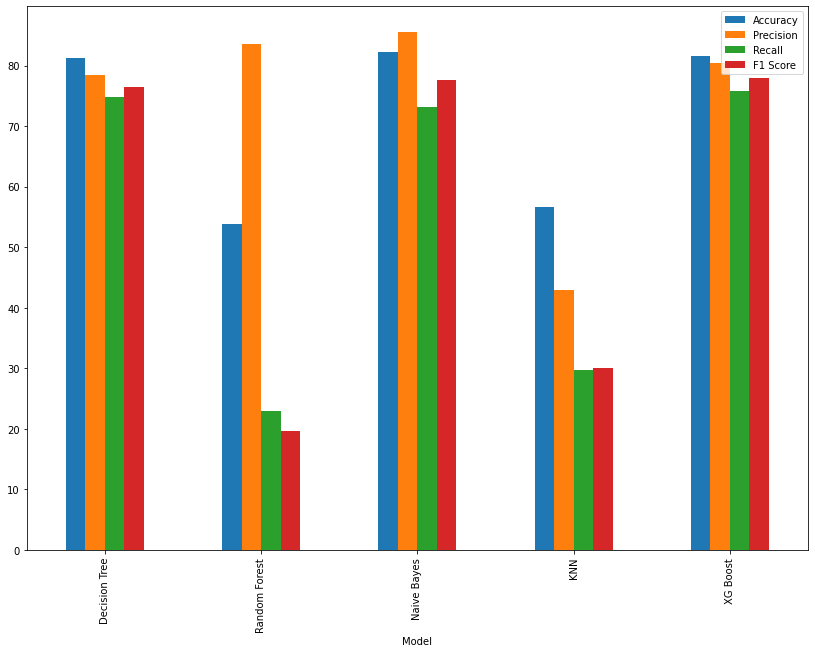

In [ ]:
dt_Accuracy = 81.3
dt_Precision = 78.4
dt_Recall = 74.8
dt_F1 = 76.4

rf_Accuracy = 53.9
rf_Precision = 83.6
rf_Recall = 23.0
rf_F1 = 19.6

nb_Accuracy = 82.3
nb_Precision = 85.5
nb_Recall = 73.2
nb_F1 = 77.6

knn_Accuracy = 56.6
knn_Precision = 42.9
knn_Recall = 29.7
knn_F1 = 30.0

xgb_Accuracy = 81.6
xgb_Precision = 80.5
xgb_Recall = 75.8
xgb_F1 = 78.0
# initialize list of lists
results = [['Decision Tree', dt_Accuracy,dt_Precision,dt_Recall,dt_F1], ['Random Forest', rf_Accuracy,rf_Precision,rf_Recall,rf_F1], ['Naive Bayes', nb_Accuracy,nb_Precision,nb_Recall,nb_F1],
           ['KNN', knn_Accuracy,knn_Precision,knn_Recall,knn_F1], ['XG Boost',xgb_Accuracy,xgb_Precision,xgb_Recall,xgb_F1] ]
 
# Create the pandas DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1 Score'])
 
results_df.set_index('Model').plot.bar(figsize=(14, 10))

From the above graph we can see that random forest and KNN perform very poorly. Hence eliminating them.

# Testing on Real data

In [ ]:
vectorizer_real = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_real = vectorizer_real.fit_transform(X_real.squeeze())

Decision Tree

In [ ]:
real_y_pred = dtree.predict(vect_X_real)
scoring(y_real, real_y_pred)

Accuracy: 67.1%
Precision: 32.0%
Recall: 20.0%
F1: 16.1%


Random Forest 

In [ ]:
real_y_pred = rdmfst.predict(vect_X_real)
scoring(y_real, real_y_pred)

Accuracy: 67.1%
Precision: 13.4%
Recall: 20.0%
F1: 16.1%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes

In [ ]:
real_y_pred = NB.predict(vect_X_real)
scoring(y_real, real_y_pred)

Accuracy: 17.0%
Precision: 27.4%
Recall: 31.0%
F1: 17.4%


K Nearest neighbour

In [ ]:
real_y_pred = n.predict(vect_X_real)
scoring(y_real, real_y_pred)

Accuracy: 55.2%
Precision: 20.3%
Recall: 20.3%
F1: 19.5%


XG Boost

In [ ]:
real_y_pred = xgb.predict(vect_X_real)
scoring(y_real, real_y_pred)

Accuracy: 67.1%
Precision: 26.9%
Recall: 20.0%
F1: 16.1%


#Trying Count vectorizer and TFIDF with different max_features

In [ ]:
real_X = df_test['narrative']
real_y = df_test['product']

Gradient Boosting with TFIDF and max_feature 20,000

In [ ]:
gb_vectorizer = TfidfVectorizer(max_features=20000)
vect_X_train = gb_vectorizer.fit_transform(X_train)
vect_X_test = gb_vectorizer.transform(real_X)
gb = GradientBoostingClassifier(random_state=999, max_depth=5)
gb.fit(vect_X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=999)

In [ ]:
gb_vectorizer = TfidfVectorizer(max_features=20000)
vect_X_train = gb_vectorizer.fit_transform(X_train)
vect_X_test = gb_vectorizer.transform(real_X)

In [ ]:
real_y_pred = gb.predict(vect_X_test)
scoring(y_real, real_y_pred)

Accuracy: 88.0%
Precision: 82.4%
Recall: 78.2%
F1: 80.2%


In [ ]:
print(classification_report(y_real ,real_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.69     30890
           1       0.76      0.69      0.72     19440
           2       0.91      0.95      0.93    196091
           3       0.88      0.84      0.86     23161
           4       0.83      0.77      0.80     22741

    accuracy                           0.88    292323
   macro avg       0.82      0.78      0.80    292323
weighted avg       0.88      0.88      0.88    292323



Naive Bayes model

In [ ]:
nb_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=80000)
vect_X_train = nb_vectorizer.fit_transform(X_train)
vect_X_test = nb_vectorizer.transform(real_X)
nb = MultinomialNB(alpha=0.45)

In [ ]:
nb.fit(vect_X_train, y_train)
real_y_pred = nb.predict(vect_X_test)
scoring(y_real, real_y_pred)

Accuracy: 85.1%
Precision: 74.5%
Recall: 81.5%
F1: 77.6%


Naive bias performs better with count vectoriser and max features of 80,000 with a F1 of 77.6%

But Gradient boosting performs better than Naive Bais with TFIDF vectoriser and max features of 20,000.

The caviat with Gradient boosting is that it takes longer than Naive bais for the training and prediction. But  that trade-off can be accepted with better accuracy.

Hence finalizing Gradient boosting as a the model to be deployed.

The models are saved using Pickle to be reused.


In [ ]:
# saving  model
import pickle
filename='GBC.sav'
pickle.dump(gb, open(filename, 'wb'))
pickle.dump(gb_vectorizer, open('TFIDF_Vect.pkl', 'wb'))